# Image Destortion

### Importeer Libraries

In [7]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf

### Laad model

In [8]:
model = tf.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

### Bekijk images

In [9]:
mustang = imread('mustang.jpg')
panda = imread('panda.jpg')
gitaar = imread('guitar.jpg')

(3,)


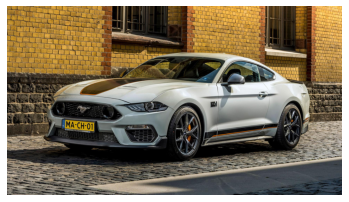

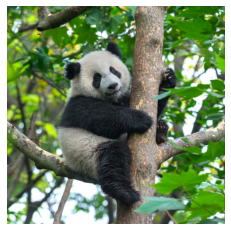

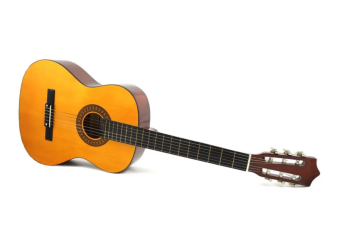

In [10]:
images = np.array([mustang, panda, gitaar], dtype='object')
print(images.shape)

for image in images:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Probabilities

In [37]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions

def get_probablilities(img, distorted = False):
    x = image.img_to_array(img)
    if distorted:
        x *= 20
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=3)[0]

##### distorted

normaal


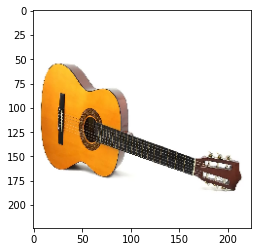

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n02676566', 'acoustic_guitar', 0.99739933), ('n03272010', 'electric_guitar', 0.0017838285), ('n02787622', 'banjo', 0.0007014164)]
distorted


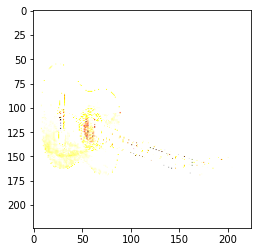

probs:  [('n06359193', 'web_site', 0.5180676), ('n04485082', 'tripod', 0.28458154), ('n02708093', 'analog_clock', 0.03124669)]

normaal


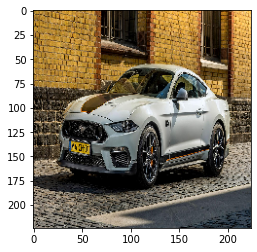

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n04285008', 'sports_car', 0.73257357), ('n03100240', 'convertible', 0.111673184), ('n04037443', 'racer', 0.08373105)]
distorted


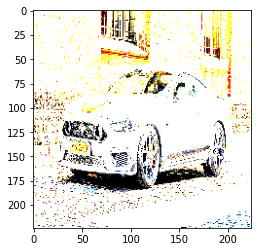

probs:  [('n07753592', 'banana', 0.32782236), ('n03666591', 'lighter', 0.11053347), ('n02708093', 'analog_clock', 0.10440078)]

normaal


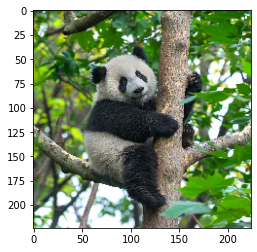

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


probs:  [('n02510455', 'giant_panda', 0.97553843), ('n02500267', 'indri', 0.007895231), ('n02497673', 'Madagascar_cat', 0.0017041796)]
distorted


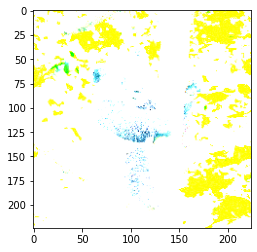

probs:  [('n02500267', 'indri', 0.268481), ('n04371774', 'swing', 0.08949199), ('n03457902', 'greenhouse', 0.08464847)]



In [40]:
for img in images:
    x = image.img_to_array(img)
    print('normaal')
    plt.imshow(x/255.)
    plt.show()
    print('probs: ', get_probablilities(img))
    x *= 15
    print('distorted')
    plt.imshow(x/255.)
    plt.show()
    print('probs: ', get_probablilities(img, distorted=True))
    print()


### Evaluatie

Door de pixels te veranderen, oftewel een image te vervormen, kun je ervoor zorgen dat de kans dat de model het goed heeft verlagen. Ik heb mij mijn voorbeeld de array * 20 te gedaan. Dit geeft die gele/blauwe lege images die je hierboven kunt zien. Als je het x2 zou doen, zou het wel nog op de oorspronkelijke image lijken.